# 📈 Netflix Dataset — Exploratory Analysis

This notebook performs detailed exploratory data analysis on the cleaned Netflix dataset, focusing on temporal trends, content distribution, and key insights about Netflix's content strategy.

---

## 🔖 Table of Contents

1. [Load Processed Data](#cell-0--load-processed-data)
2. [Question 1: Time Evolution (Titles Added by Year)](#cell-1--question-1-time-evolution-titles-added-by-year)  
---

## ✅ Objective
- Analyze temporal trends in Netflix content additions
- Understand content distribution patterns
- Identify top genres and production countries
- Extract actionable insights about Netflix's content strategy
- Create compelling visualizations for stakeholder presentation

## Cell 0 — Load Processed Data  
We load the cleaned dataset from our previous notebook and set up the visualization environment for our exploratory analysis.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

dfw = pd.read_csv("../data/processed/netflix_clean.csv", parse_dates=["date_added"])

## Cell 1 — Question 1: Time Evolution (Titles Added by Year)  
🔎 **Research Question**: How has Netflix's content addition strategy evolved over time?

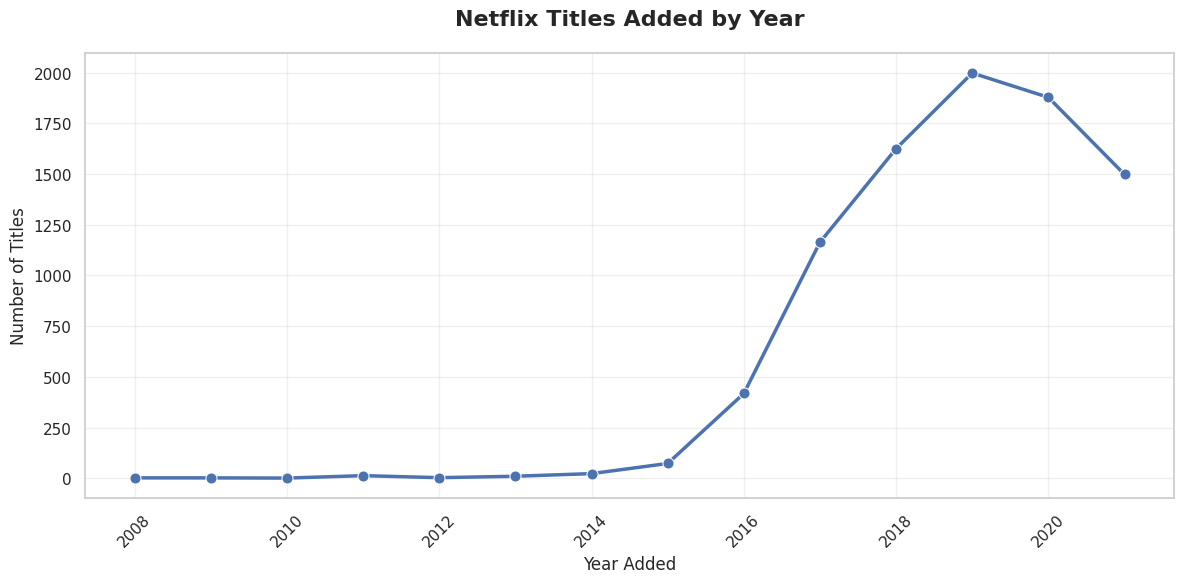

📊 Netflix Titles Added by Year (Recent Years)
 Year Added  Number of Titles
     2012.0                 3
     2013.0                10
     2014.0                23
     2015.0                73
     2016.0               418
     2017.0              1164
     2018.0              1625
     2019.0              1998
     2020.0              1878
     2021.0              1498


In [45]:
dfw['year_added'] = dfw['date_added'].dt.year

titles_per_year = dfw.groupby('year_added')['show_id'].count().reset_index()
titles_per_year.columns = ['Year Added', 'Number of Titles']

#Graphic
plt.figure(figsize=(12,6))
sns.lineplot(data=titles_per_year, x='Year Added', y='Number of Titles', 
             marker='o', linewidth=2.5, markersize=8)
plt.title("Netflix Titles Added by Year", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Year Added", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../figures/titles_per_year.png", dpi=150, bbox_inches='tight')
plt.show()

# Display styled table
print("📊 Netflix Titles Added by Year (Recent Years)")
print("=" * 45)
styled_table = titles_per_year.tail(10).copy()
styled_table.index = range(1, len(styled_table) + 1)
print(styled_table.to_string(index=False))

## Cell 2 — Question 2: Content Type Distribution (Movies vs TV Shows)  
🔎 **Research Question**: What is the overall distribution between Movies and TV Shows, and how has this balance evolved over time?

### 2a — Overall Content Distribution

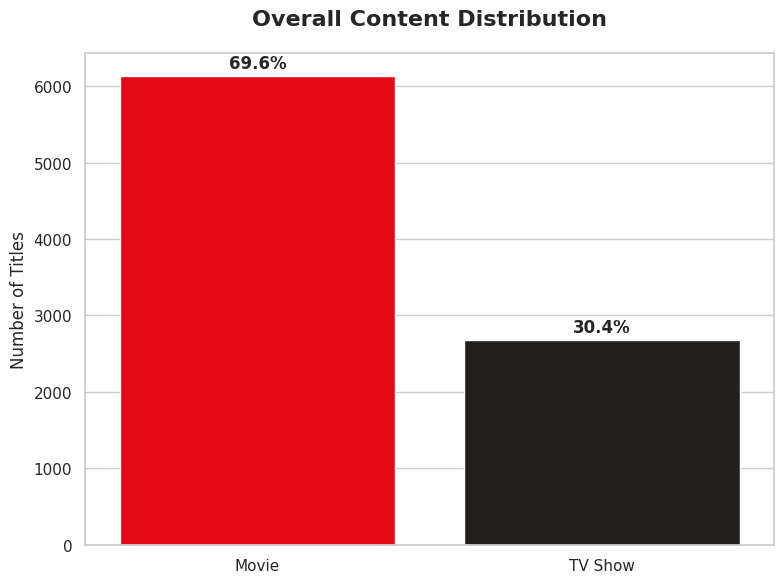

📊 Content Type Distribution Summary
Content Type  Count  Percentage
       Movie   6130        69.6
     TV Show   2676        30.4

🎬 Total Movies: 6,130
📺 Total TV Shows: 2,676
📈 Movies to TV Shows Ratio: 2.29:1


In [46]:
type_counts = dfw['type'].value_counts().reset_index()
type_counts.columns = ['Content Type', 'Count']

# Plot: Overall distribution
plt.figure(figsize=(8, 6))
bars = sns.barplot(data=type_counts, x='Content Type', y='Count')
bars.patches[0].set_facecolor('#E50914')  # Netflix red for first bar
bars.patches[1].set_facecolor('#221F1F')  # Netflix black for second bar
plt.title("Overall Content Distribution", fontsize=16, fontweight='bold', pad=20)
plt.ylabel("Number of Titles", fontsize=12)
plt.xlabel("")

# Add percentage labels on bars
total = type_counts['Count'].sum()
for i, v in enumerate(type_counts['Count']):
    percentage = (v/total) * 100
    plt.text(i, v + 50, f'{percentage:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig("../figures/content_type_distribution.png", dpi=150, bbox_inches='tight')
plt.show()

# Display summary statistics
print("📊 Content Type Distribution Summary")
print("=" * 50)
type_summary = type_counts.copy()
type_summary['Percentage'] = (type_summary['Count'] / type_summary['Count'].sum() * 100).round(1)
print(type_summary.to_string(index=False))

print(f"\n🎬 Total Movies: {type_counts.iloc[0]['Count']:,}")
print(f"📺 Total TV Shows: {type_counts.iloc[1]['Count']:,}")
print(f"📈 Movies to TV Shows Ratio: {type_counts.iloc[0]['Count']/type_counts.iloc[1]['Count']:.2f}:1")

### 2b — Content Type Evolution Over Time

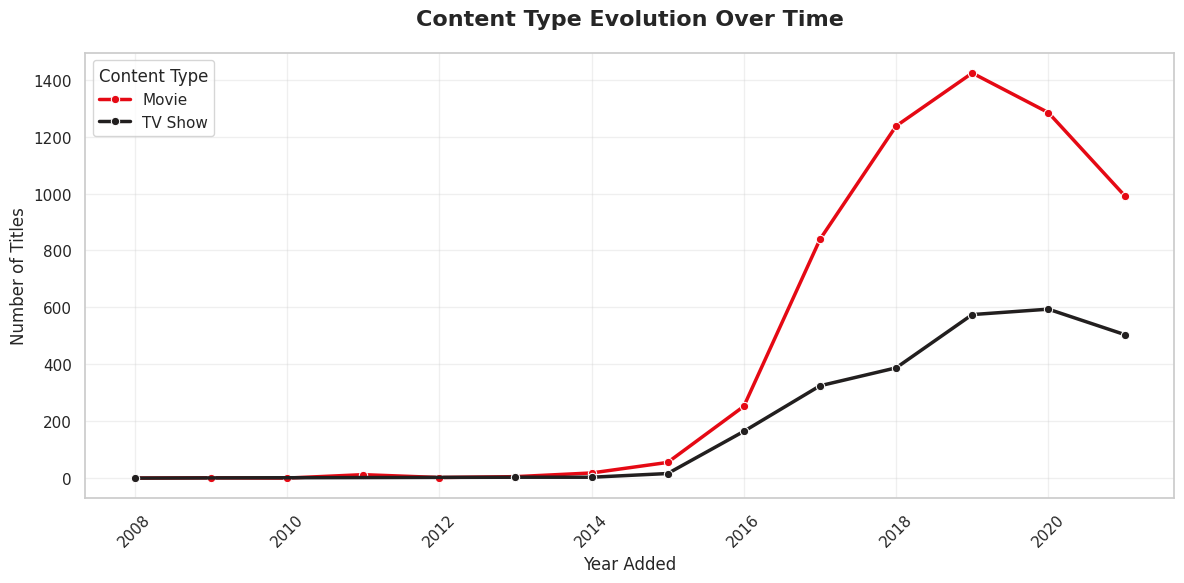


📈 Content Type Evolution Summary
type         Movie  TV Show   Total  Movie %  TV Show %
year_added                                             
2012.0         3.0      0.0     3.0    100.0        0.0
2013.0         6.0      4.0    10.0     60.0       40.0
2014.0        19.0      4.0    23.0     82.6       17.4
2015.0        56.0     17.0    73.0     76.7       23.3
2016.0       253.0    165.0   418.0     60.5       39.5
2017.0       839.0    325.0  1164.0     72.1       27.9
2018.0      1237.0    388.0  1625.0     76.1       23.9
2019.0      1423.0    575.0  1998.0     71.2       28.8
2020.0      1284.0    594.0  1878.0     68.4       31.6
2021.0       993.0    505.0  1498.0     66.3       33.7


In [47]:
type_per_year = dfw.groupby(['year_added','type']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=type_per_year, x='year_added', y='count', hue='type', 
             marker='o', linewidth=2.5, markersize=6, palette=['#E50914', '#221F1F'])
plt.title("Content Type Evolution Over Time", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Year Added", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.legend(title="Content Type", title_fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("../figures/content_type_evolution.png", dpi=150, bbox_inches='tight')
plt.show()

# Display evolution summary
print("\n📈 Content Type Evolution Summary")
print("=" * 50)
yearly_summary = type_per_year.pivot(index='year_added', columns='type', values='count').fillna(0)
yearly_summary['Total'] = yearly_summary.sum(axis=1)
yearly_summary['Movie %'] = (yearly_summary['Movie'] / yearly_summary['Total'] * 100).round(1)
yearly_summary['TV Show %'] = (yearly_summary['TV Show'] / yearly_summary['Total'] * 100).round(1)
print(yearly_summary.tail(10).to_string())